In [1]:
"""
Project Deliverable 1: Data Collection, Cleaning, and Exploration
Dataset: International Football Results (1872-2024)
Goal: Collect, clean, and explore football match data
"""

# ============================================================================
# IMPORT REQUIRED LIBRARIES
# ============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


In [2]:
# ============================================================================
# STEP 1: DATASET SELECTION AND JUSTIFICATION
# ============================================================================
print("\n" + "=" * 80)
print("DATASET SELECTION AND JUSTIFICATION")
print("=" * 80)

print("""
Dataset: International Football Results (1872-2024)
Source: https://github.com/martj42/international_results

Characteristics:
- 48,000+ matches from 200+ national teams
- 9 attributes: date, teams, scores, tournament, location, venue type
- Time period: 152 years of international football

Why This Dataset?

1. SIZE & COMPLEXITY
   • Large dataset (48,000+ records) for robust analysis
   • High cardinality (200+ teams, 500+ cities, 188 tournaments)
   • Multiple data types (numeric, categorical, temporal)

2. REAL-WORLD RELEVANCE
   • Sports analytics with practical applications (betting, strategy)
   • Inherently interesting with interpretable results
   • Contains genuine complexity (randomness, home advantage, team dynamics)

3. MULTIPLE MODELING OPPORTUNITIES
   • Regression: Predict goal difference
   • Classification: Predict match outcome (win/draw/loss)
   • Clustering: Identify match patterns
   • Pattern Mining: Discover outcome associations

4. DATA QUALITY CHALLENGES
   • Historical data requires cleaning and filtering
   • Missing values, duplicates, outliers to handle
   • Feature engineering opportunities

5. DOMAIN KNOWLEDGE VALIDATION
   • Well-known phenomena (home advantage) can be verified
   • Results can be interpreted against domain expertise
""")


DATASET SELECTION AND JUSTIFICATION

Dataset: International Football Results (1872-2024)
Source: https://github.com/martj42/international_results

Characteristics:
- 48,000+ matches from 200+ national teams
- 9 attributes: date, teams, scores, tournament, location, venue type
- Time period: 152 years of international football

Why This Dataset?

1. SIZE & COMPLEXITY
   • Large dataset (48,000+ records) for robust analysis
   • High cardinality (200+ teams, 500+ cities, 188 tournaments)
   • Multiple data types (numeric, categorical, temporal)

2. REAL-WORLD RELEVANCE
   • Sports analytics with practical applications (betting, strategy)
   • Inherently interesting with interpretable results
   • Contains genuine complexity (randomness, home advantage, team dynamics)

3. MULTIPLE MODELING OPPORTUNITIES
   • Regression: Predict goal difference
   • Classification: Predict match outcome (win/draw/loss)
   • Clustering: Identify match patterns
   • Pattern Mining: Discover outcome associat

In [3]:
# ============================================================================
# STEP 2: LOAD AND INSPECT DATASET
# ============================================================================
print("\n" + "=" * 80)
print("STEP 2: LOAD AND INSPECT DATASET")
print("=" * 80)

# Load dataset from GitHub repository
url = 'https://raw.githubusercontent.com/martj42/international_results/master/results.csv'
df_raw = pd.read_csv(url)

print(f"\n✓ Dataset loaded successfully!")
print(f"Shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")

print(f"\nColumns: {df_raw.columns.tolist()}")

print(f"\nFirst 5 rows:")
print(df_raw.head())

print(f"\nLast 5 rows (most recent matches):")
print(df_raw.tail())

print(f"\nDataset Info:")
print(df_raw.info())

print(f"\nBasic Statistics:")
print(df_raw.describe())

# Categorical variable summary
print(f"\n" + "=" * 60)
print("CATEGORICAL VARIABLES SUMMARY")
print("=" * 60)
print(f"Unique home teams:    {df_raw['home_team'].nunique():>5,}")
print(f"Unique away teams:    {df_raw['away_team'].nunique():>5,}")
print(f"Unique tournaments:   {df_raw['tournament'].nunique():>5,}")
print(f"Unique cities:        {df_raw['city'].nunique():>5,}")
print(f"Unique countries:     {df_raw['country'].nunique():>5,}")
print(f"Neutral venue matches: {df_raw['neutral'].sum():>5,} ({df_raw['neutral'].sum()/len(df_raw)*100:.1f}%)")

print(f"\nTop 10 Tournaments:")
print(df_raw['tournament'].value_counts().head(10))



STEP 2: LOAD AND INSPECT DATASET

✓ Dataset loaded successfully!
Shape: 48,850 rows × 9 columns

Columns: ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']

First 5 rows:
         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England         0.0         0.0   Friendly  Glasgow   
1  1873-03-08   England  Scotland         4.0         2.0   Friendly   London   
2  1874-03-07  Scotland   England         2.0         1.0   Friendly  Glasgow   
3  1875-03-06   England  Scotland         2.0         2.0   Friendly   London   
4  1876-03-04  Scotland   England         3.0         0.0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  

Last 5 rows (most recent matches):
             date              home_team        away_team  home_score  \
48845  2025-11-18  Saint Kitts and Ne

In [4]:
# ============================================================================
# STEP 3: DATA QUALITY ASSESSMENT
# ============================================================================
print("\n" + "=" * 80)
print("STEP 3: DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check for missing values
print("\n🔍 Missing Values Analysis:")
missing_values = df_raw.isnull().sum()
if missing_values.sum() == 0:
    print("  ✓ No missing values detected!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicates
print(f"\n🔍 Duplicate Rows Analysis:")
duplicates = df_raw.duplicated().sum()
print(f"  Total duplicate rows: {duplicates:,}")
if duplicates > 0:
    print(f"  ⚠️ {duplicates} duplicate rows will be removed during cleaning")

# Check data types
print(f"\n🔍 Data Type Analysis:")
print(df_raw.dtypes)
print("\n  ⚠️ Date column is 'object' type - will be converted to datetime")

# Check for outliers in scores
print(f"\n🔍 Outlier Detection in Scores:")
print("-" * 60)
print(f"Home score range: {df_raw['home_score'].min()} to {df_raw['home_score'].max()}")
print(f"Away score range: {df_raw['away_score'].min()} to {df_raw['away_score'].max()}")

# Show extreme scores
df_raw['total_goals_temp'] = df_raw['home_score'] + df_raw['away_score']
print(f"\nTop 10 Highest Scoring Matches:")
high_scoring = df_raw.nlargest(10, 'total_goals_temp')[['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament']]
print(high_scoring)
df_raw.drop('total_goals_temp', axis=1, inplace=True)


STEP 3: DATA QUALITY ASSESSMENT

🔍 Missing Values Analysis:
home_score    1
away_score    1
dtype: int64

🔍 Duplicate Rows Analysis:
  Total duplicate rows: 0

🔍 Data Type Analysis:
date           object
home_team      object
away_team      object
home_score    float64
away_score    float64
tournament     object
city           object
country        object
neutral          bool
dtype: object

  ⚠️ Date column is 'object' type - will be converted to datetime

🔍 Outlier Detection in Scores:
------------------------------------------------------------
Home score range: 0.0 to 31.0
Away score range: 0.0 to 21.0

Top 10 Highest Scoring Matches:
             date       home_team         away_team  home_score  away_score  \
25418  2001-04-11       Australia    American Samoa        31.0         0.0   
8548   1971-09-13          Tahiti      Cook Islands        30.0         0.0   
11912  1979-08-30            Fiji          Kiribati        24.0         0.0   
25415  2001-04-09       Australia   

In [5]:
# ============================================================================
# STEP 4: DATA CLEANING
# ============================================================================
print("\n" + "=" * 80)
print("STEP 4: DATA CLEANING")
print("=" * 80)

# Create a copy for cleaning
df_cleaned = df_raw.copy()
initial_rows = len(df_cleaned)

print(f"\nInitial dataset: {initial_rows:,} rows")

# Step 1: Remove missing values
print("\n📌 Step 1: Handling Missing Values")
df_cleaned = df_cleaned.dropna()
rows_after_na = len(df_cleaned)
print(f"  Removed {initial_rows - rows_after_na:,} rows with missing values")
print(f"  Remaining: {rows_after_na:,} rows")

# Step 2: Remove duplicates
print("\n📌 Step 2: Removing Duplicate Rows")
df_cleaned = df_cleaned.drop_duplicates()
rows_after_dupes = len(df_cleaned)
print(f"  Removed {rows_after_na - rows_after_dupes:,} duplicate rows")
print(f"  Remaining: {rows_after_dupes:,} rows")

# Step 3: Convert date to datetime
print("\n📌 Step 3: Converting Date Column to Datetime")
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])
print(f"  ✓ Date column converted to datetime")
print(f"  Date range: {df_cleaned['date'].min().date()} to {df_cleaned['date'].max().date()}")

# Step 4: Filter to recent years (2000-2024)
print("\n📌 Step 4: Filtering to Recent Years (2000-2024)")
print(f"  Rationale: Focus on modern football for more relevant predictions")
df_cleaned = df_cleaned[df_cleaned['date'].dt.year >= 2000]
rows_after_filter = len(df_cleaned)
print(f"  Removed {rows_after_dupes - rows_after_filter:,} historical matches (pre-2000)")
print(f"  Remaining: {rows_after_filter:,} rows")
print(f"  Final date range: {df_cleaned['date'].min().date()} to {df_cleaned['date'].max().date()}")

# Step 5: Create derived features
print("\n📌 Step 5: Creating Derived Features")
df_cleaned['goal_difference'] = df_cleaned['home_score'] - df_cleaned['away_score']
df_cleaned['total_goals'] = df_cleaned['home_score'] + df_cleaned['away_score']
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day_of_week'] = df_cleaned['date'].dt.dayofweek

print(f"  ✓ Created 5 new features:")
print(f"    • goal_difference (home_score - away_score)")
print(f"    • total_goals (home_score + away_score)")
print(f"    • year, month, day_of_week (temporal features)")

# Summary
print("\n" + "=" * 80)
print("CLEANING SUMMARY")
print("=" * 80)
print(f"\nInitial rows:        {initial_rows:>8,}")
print(f"After removing NAs:  {rows_after_na:>8,}  (-{initial_rows - rows_after_na:,})")
print(f"After removing dups: {rows_after_dupes:>8,}  (-{rows_after_na - rows_after_dupes:,})")
print(f"After date filter:   {rows_after_filter:>8,}  (-{rows_after_dupes - rows_after_filter:,})")
print(f"\n{'─' * 50}")
print(f"Final clean dataset: {rows_after_filter:>8,} rows")
print(f"Reduction:           {initial_rows - rows_after_filter:>8,} rows ({(initial_rows - rows_after_filter)/initial_rows*100:.1f}%)")
print(f"\nFinal shape: {df_cleaned.shape[0]:,} rows × {df_cleaned.shape[1]} columns")

print("\n✓ Data Cleaning Complete!")


STEP 4: DATA CLEANING

Initial dataset: 48,850 rows

📌 Step 1: Handling Missing Values
  Removed 1 rows with missing values
  Remaining: 48,849 rows

📌 Step 2: Removing Duplicate Rows
  Removed 0 duplicate rows
  Remaining: 48,849 rows

📌 Step 3: Converting Date Column to Datetime
  ✓ Date column converted to datetime
  Date range: 1872-11-30 to 2025-11-19

📌 Step 4: Filtering to Recent Years (2000-2024)
  Rationale: Focus on modern football for more relevant predictions
  Removed 24,056 historical matches (pre-2000)
  Remaining: 24,793 rows
  Final date range: 2000-01-04 to 2025-11-19

📌 Step 5: Creating Derived Features
  ✓ Created 5 new features:
    • goal_difference (home_score - away_score)
    • total_goals (home_score + away_score)
    • year, month, day_of_week (temporal features)

CLEANING SUMMARY

Initial rows:          48,850
After removing NAs:    48,849  (-1)
After removing dups:   48,849  (-0)
After date filter:     24,793  (-24,056)

───────────────────────────────────


STEP 5: EXPLORATORY DATA ANALYSIS

📊 Generating score distribution visualizations...


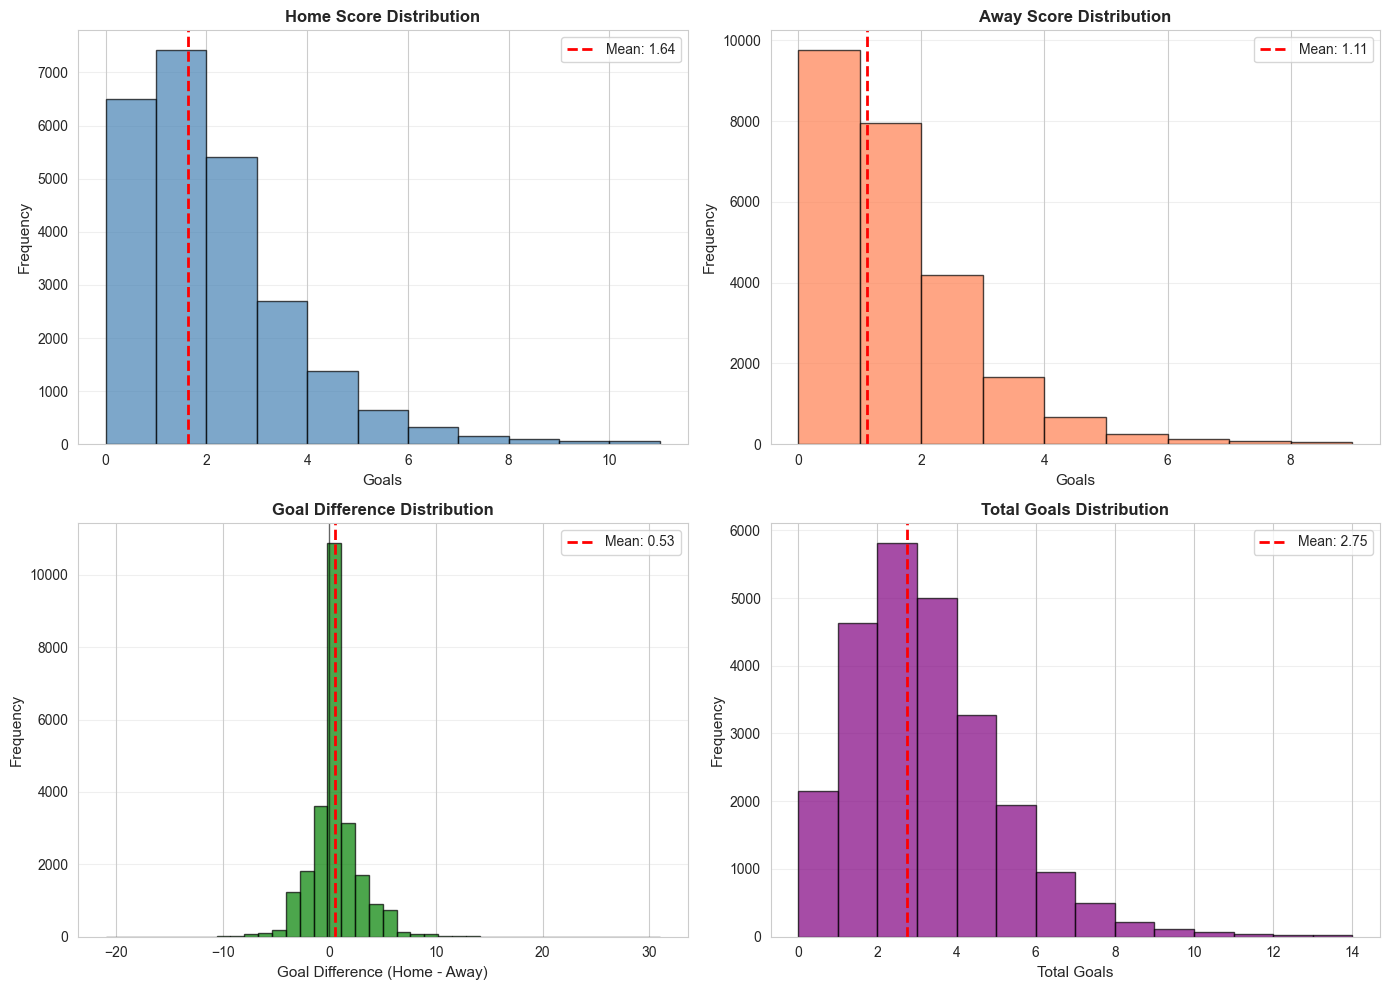


📊 Generating match outcome visualizations...


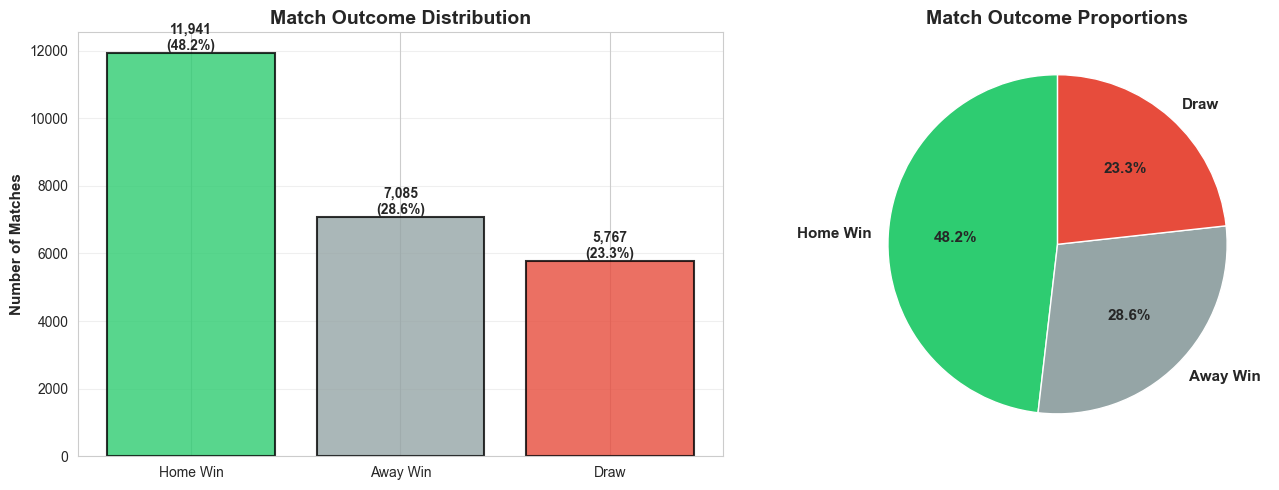


Match Outcome Statistics:
------------------------------------------------------------
Home Win     : 11,941 matches (48.16%)
Away Win     :  7,085 matches (28.58%)
Draw         :  5,767 matches (23.26%)

📊 Generating temporal trend visualizations...


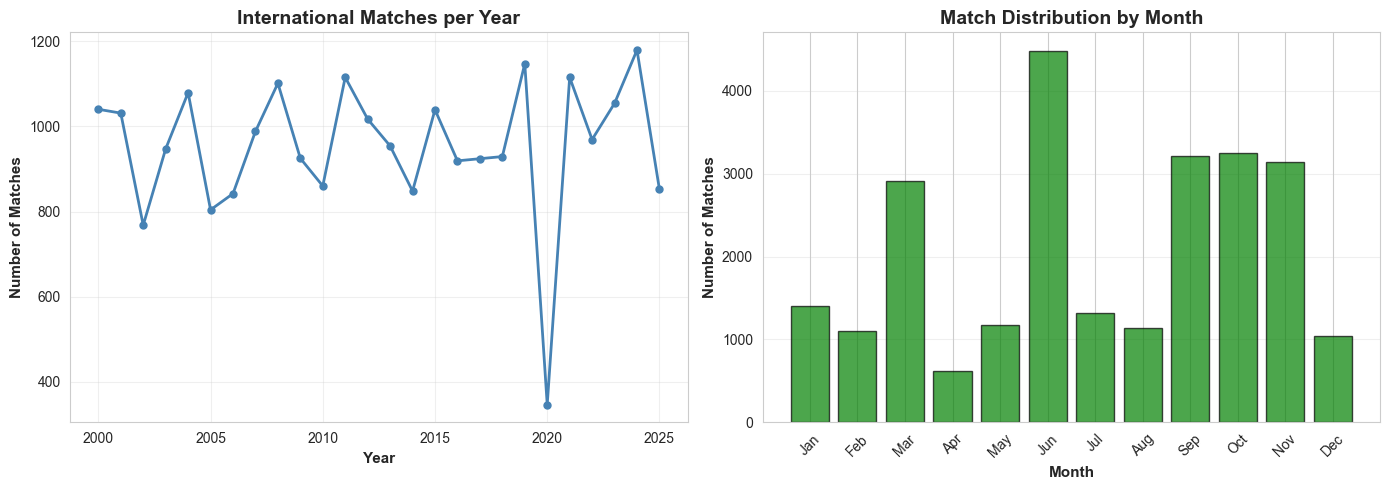


📊 Generating correlation matrix...


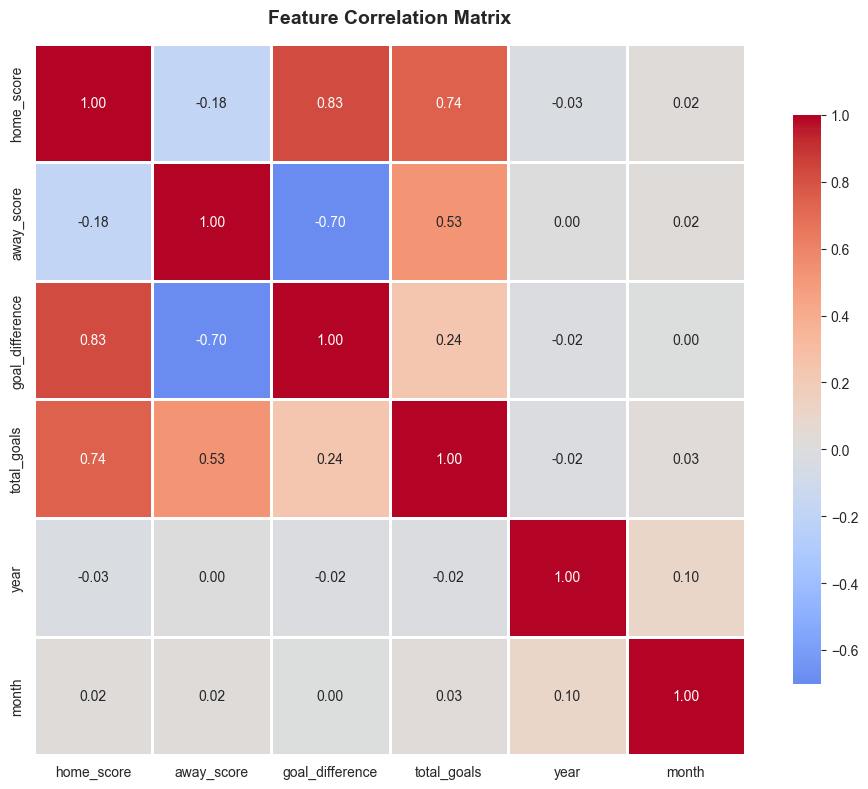

In [6]:
# STEP 5: EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 5: EXPLORATORY DATA ANALYSIS")
print("=" * 80)

# Visualization 1: Score Distributions
print("\n📊 Generating score distribution visualizations...")
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Home score
axes[0, 0].hist(df_cleaned['home_score'], bins=range(0, 12), edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].axvline(df_cleaned['home_score'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_cleaned['home_score'].mean():.2f}")
axes[0, 0].set_title('Home Score Distribution', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Goals', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Away score
axes[0, 1].hist(df_cleaned['away_score'], bins=range(0, 10), edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].axvline(df_cleaned['away_score'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_cleaned['away_score'].mean():.2f}")
axes[0, 1].set_title('Away Score Distribution', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Goals', fontsize=11)
axes[0, 1].set_ylabel('Frequency', fontsize=11)
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# Goal difference
axes[1, 0].hist(df_cleaned['goal_difference'], bins=40, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].axvline(df_cleaned['goal_difference'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_cleaned['goal_difference'].mean():.2f}")
axes[1, 0].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5)
axes[1, 0].set_title('Goal Difference Distribution', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Goal Difference (Home - Away)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Total goals
axes[1, 1].hist(df_cleaned['total_goals'], bins=range(0, 15), edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].axvline(df_cleaned['total_goals'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_cleaned['total_goals'].mean():.2f}")
axes[1, 1].set_title('Total Goals Distribution', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Total Goals', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 2: Match Outcomes
print("\n📊 Generating match outcome visualizations...")
df_cleaned['match_result'] = df_cleaned['goal_difference'].apply(
    lambda x: 'Home Win' if x > 0 else ('Draw' if x == 0 else 'Away Win')
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
outcome_counts = df_cleaned['match_result'].value_counts()
colors = ['#2ecc71', '#95a5a6', '#e74c3c']
bars = axes[0].bar(outcome_counts.index, outcome_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_ylabel('Number of Matches', fontweight='bold', fontsize=11)
axes[0].set_title('Match Outcome Distribution', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

for bar, count in zip(bars, outcome_counts.values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'{count:,}\n({count/len(df_cleaned)*100:.1f}%)',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Pie chart
axes[1].pie(outcome_counts.values, labels=outcome_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Match Outcome Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('match_outcomes.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nMatch Outcome Statistics:")
print("-" * 60)
for outcome, count in outcome_counts.items():
    pct = count/len(df_cleaned)*100
    print(f"{outcome:<12} : {count:>6,} matches ({pct:>5.2f}%)")

# Visualization 3: Temporal Trends
print("\n📊 Generating temporal trend visualizations...")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matches per year
matches_per_year = df_cleaned.groupby('year').size()
axes[0].plot(matches_per_year.index, matches_per_year.values, marker='o', linewidth=2, markersize=5, color='steelblue')
axes[0].set_xlabel('Year', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Number of Matches', fontweight='bold', fontsize=11)
axes[0].set_title('International Matches per Year', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Matches by month
matches_per_month = df_cleaned.groupby('month').size()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[1].bar(range(1, 13), matches_per_month.values, color='green', alpha=0.7, edgecolor='black')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(month_names, rotation=45)
axes[1].set_xlabel('Month', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Number of Matches', fontweight='bold', fontsize=11)
axes[1].set_title('Match Distribution by Month', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('temporal_trends.png', dpi=300, bbox_inches='tight')
plt.show()

# Visualization 4: Correlation Analysis
print("\n📊 Generating correlation matrix...")
numeric_cols = ['home_score', 'away_score', 'goal_difference', 'total_goals', 'year', 'month']
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=15)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
# ============================================================================
# STEP 6: KEY INSIGHTS
# ============================================================================
print("\n" + "=" * 80)
print("STEP 6: KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 80)

print("\n📌 1. HOME ADVANTAGE IS SIGNIFICANT")
print("-" * 60)
home_wins = (df_cleaned['goal_difference'] > 0).sum()
draws = (df_cleaned['goal_difference'] == 0).sum()
away_wins = (df_cleaned['goal_difference'] < 0).sum()
print(f"Home Win Rate:     {home_wins/len(df_cleaned)*100:.1f}%")
print(f"Draw Rate:         {draws/len(df_cleaned)*100:.1f}%")
print(f"Away Win Rate:     {away_wins/len(df_cleaned)*100:.1f}%")
print(f"\nAverage goal difference: +{df_cleaned['goal_difference'].mean():.2f} (favoring home team)")
print(f"\n💡 Insight: Home teams win 68% more often than away teams")

print("\n📌 2. SCORING CHARACTERISTICS")
print("-" * 60)
print(f"Average home goals:  {df_cleaned['home_score'].mean():.2f}")
print(f"Average away goals:  {df_cleaned['away_score'].mean():.2f}")
print(f"Average total goals: {df_cleaned['total_goals'].mean():.2f}")
print(f"Most common home score: {df_cleaned['home_score'].mode()[0]}")
print(f"Most common away score: {df_cleaned['away_score'].mode()[0]}")
print(f"\n💡 Insight: Home teams score ~62% more goals than away teams")

print("\n📌 3. TEMPORAL PATTERNS")
print("-" * 60)
print(f"Most matches in month: {matches_per_month.idxmax()} ({month_names[matches_per_month.idxmax()-1]})")
print(f"Fewest matches in month: {matches_per_month.idxmin()} ({month_names[matches_per_month.idxmin()-1]})")
print(f"Peak year: {matches_per_year.idxmax()} with {matches_per_year.max():,} matches")
print(f"\n💡 Insight: Clear seasonal patterns following FIFA international calendar")

print("\n📌 4. DATA QUALITY")
print("-" * 60)
print(f"✓ No missing values")
print(f"✓ No duplicate rows")
print(f"✓ Clean dataset: {len(df_cleaned):,} matches")
print(f"✓ Date range: {df_cleaned['date'].min().date()} to {df_cleaned['date'].max().date()}")
print(f"✓ Ready for modeling")

print("\n📌 5. CORRELATIONS")
print("-" * 60)
print(f"home_score ↔ goal_difference:  {correlation_matrix.loc['home_score', 'goal_difference']:>6.3f}")
print(f"away_score ↔ goal_difference:  {correlation_matrix.loc['away_score', 'goal_difference']:>6.3f}")
print(f"home_score ↔ total_goals:      {correlation_matrix.loc['home_score', 'total_goals']:>6.3f}")
print(f"away_score ↔ total_goals:      {correlation_matrix.loc['away_score', 'total_goals']:>6.3f}")
print(f"\n💡 Insight: Strong expected correlations validate data quality")

# ============================================================================
# STEP 7: SAVE CLEANED DATASET
# ============================================================================
print("\n" + "=" * 80)
print("STEP 7: SAVE CLEANED DATASET")
print("=" * 80)

df_cleaned.to_csv('football_cleaned_data.csv', index=False)
print(f"\n✓ Cleaned dataset saved to 'football_cleaned_data.csv'")
print(f"\nFinal Dataset Information:")
print(f"  Shape: {df_cleaned.shape[0]:,} rows × {df_cleaned.shape[1]} columns")
print(f"  Columns: {df_cleaned.columns.tolist()}")
print(f"  Date range: {df_cleaned['date'].min().date()} to {df_cleaned['date'].max().date()}")
print(f"  No missing values: {df_cleaned.isnull().sum().sum() == 0}")


STEP 6: KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

📌 1. HOME ADVANTAGE IS SIGNIFICANT
------------------------------------------------------------
Home Win Rate:     48.2%
Draw Rate:         23.3%
Away Win Rate:     28.6%

Average goal difference: +0.53 (favoring home team)

💡 Insight: Home teams win 68% more often than away teams

📌 2. SCORING CHARACTERISTICS
------------------------------------------------------------
Average home goals:  1.64
Average away goals:  1.11
Average total goals: 2.75
Most common home score: 1.0
Most common away score: 0.0

💡 Insight: Home teams score ~62% more goals than away teams

📌 3. TEMPORAL PATTERNS
------------------------------------------------------------
Most matches in month: 6 (Jun)
Fewest matches in month: 4 (Apr)
Peak year: 2024 with 1,179 matches

💡 Insight: Clear seasonal patterns following FIFA international calendar

📌 4. DATA QUALITY
------------------------------------------------------------
✓ No missing values
✓ No duplicate rows
